<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Elevation  602 non-null    float64
 1   Distance   0 non-null      float64
dtypes: float64(2)
memory usage: 9.5 KB
     Elevation   Distance
597    1459.63  98.497051
598    1459.64  98.661762
599    1459.66  98.826472
600    1459.68  98.991183
601    1459.68  99.155894


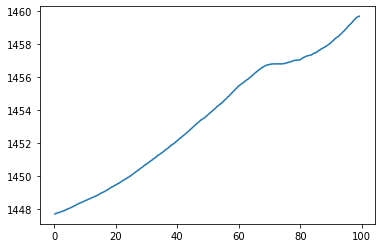

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

data = pd.read_csv("elevation1.txt", sep = "\t", names=['Elevation', 'Distance'],engine='python', encoding = "cp949")
data.info()

dis = 99.155894
d_dis = dis/len(data)

data['Distance']=range(1,len(data)+1)
#data.head()

data["Distance"] = data["Distance"] * d_dis
#data.head()
print(data.tail())
x = data['Distance']
y = data['Elevation']
plt.plot(x,y)

In [95]:
model = sklearn.linear_model.LinearRegression()
model.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.16471079  0.32942157  0.49413236  0.65884315  0.82355394  0.98826472
  1.15297551  1.3176863   1.48239709  1.64710787  1.81181866  1.97652945
  2.14124024  2.30595102  2.47066181  2.6353726   2.80008339  2.96479417
  3.12950496  3.29421575  3.45892653  3.62363732  3.78834811  3.9530589
  4.11776968  4.28248047  4.44719126  4.61190205  4.77661283  4.94132362
  5.10603441  5.2707452   5.43545598  5.60016677  5.76487756  5.92958835
  6.09429913  6.25900992  6.42372071  6.5884315   6.75314228  6.91785307
  7.08256386  7.24727464  7.41198543  7.57669622  7.74140701  7.90611779
  8.07082858  8.23553937  8.40025016  8.56496094  8.72967173  8.89438252
  9.05909331  9.22380409  9.38851488  9.55322567  9.71793646  9.88264724
 10.04735803 10.21206882 10.3767796  10.54149039 10.70620118 10.87091197
 11.03562275 11.20033354 11.36504433 11.52975512 11.6944659  11.85917669
 12.02388748 12.18859827 12.35330905 12.51801984 12.68273063 12.84744142
 13.0121522  13.17686299 13.34157378 13.50628456 13.67099535 13.83570614
 14.00041693 14.16512771 14.3298385  14.49454929 14.65926008 14.82397086
 14.98868165 15.15339244 15.31810323 15.48281401 15.6475248  15.81223559
 15.97694638 16.14165716 16.30636795 16.47107874 16.63578952 16.80050031
 16.9652111  17.12992189 17.29463267 17.45934346 17.62405425 17.78876504
 17.95347582 18.11818661 18.2828974  18.44760819 18.61231897 18.77702976
 18.94174055 19.10645134 19.27116212 19.43587291 19.6005837  19.76529449
 19.93000527 20.09471606 20.25942685 20.42413763 20.58884842 20.75355921
 20.91827    21.08298078 21.24769157 21.41240236 21.57711315 21.74182393
 21.90653472 22.07124551 22.2359563  22.40066708 22.56537787 22.73008866
 22.89479945 23.05951023 23.22422102 23.38893181 23.55364259 23.71835338
 23.88306417 24.04777496 24.21248574 24.37719653 24.54190732 24.70661811
 24.87132889 25.03603968 25.20075047 25.36546126 25.53017204 25.69488283
 25.85959362 26.02430441 26.18901519 26.35372598 26.51843677 26.68314755
 26.84785834 27.01256913 27.17727992 27.3419907  27.50670149 27.67141228
 27.83612307 28.00083385 28.16554464 28.33025543 28.49496622 28.659677
 28.82438779 28.98909858 29.15380937 29.31852015 29.48323094 29.64794173
 29.81265251 29.9773633  30.14207409 30.30678488 30.47149566 30.63620645
 30.80091724 30.96562803 31.13033881 31.2950496  31.45976039 31.62447118
 31.78918196 31.95389275 32.11860354 32.28331433 32.44802511 32.6127359
 32.77744669 32.94215748 33.10686826 33.27157905 33.43628984 33.60100062
 33.76571141 33.9304222  34.09513299 34.25984377 34.42455456 34.58926535
 34.75397614 34.91868692 35.08339771 35.2481085  35.41281929 35.57753007
 35.74224086 35.90695165 36.07166244 36.23637322 36.40108401 36.5657948
 36.73050558 36.89521637 37.05992716 37.22463795 37.38934873 37.55405952
 37.71877031 37.8834811  38.04819188 38.21290267 38.37761346 38.54232425
 38.70703503 38.87174582 39.03645661 39.2011674  39.36587818 39.53058897
 39.69529976 39.86001054 40.02472133 40.18943212 40.35414291 40.51885369
 40.68356448 40.84827527 41.01298606 41.17769684 41.34240763 41.50711842
 41.67182921 41.83653999 42.00125078 42.16596157 42.33067236 42.49538314
 42.66009393 42.82480472 42.9895155  43.15422629 43.31893708 43.48364787
 43.64835865 43.81306944 43.97778023 44.14249102 44.3072018  44.47191259
 44.63662338 44.80133417 44.96604495 45.13075574 45.29546653 45.46017732
 45.6248881  45.78959889 45.95430968 46.11902047 46.28373125 46.44844204
 46.61315283 46.77786361 46.9425744  47.10728519 47.27199598 47.43670676
 47.60141755 47.76612834 47.93083913 48.09554991 48.2602607  48.42497149
 48.58968228 48.75439306 48.91910385 49.08381464 49.24852543 49.41323621
 49.577947   49.74265779 49.90736857 50.07207936 50.23679015 50.40150094
 50.56621172 50.73092251 50.8956333  51.06034409 51.22505487 51.38976566
 51.55447645 51.71918724 51.88389802 52.04860881 52.2133196  52.37803039
 52.54274117 52.70745196 52.87216275 53.03687353 53.20158432 53.36629511
 53.5310059  53.69571668 53.86042747 54.02513826 54.18984905 54.35455983
 54.51927062 54.68398141 54.8486922  55.01340298 55.17811377 55.34282456
 55.50753535 55.67224613 55.83695692 56.00166771 56.1663785  56.33108928
 56.49580007 56.66051086 56.82522164 56.98993243 57.15464322 57.31935401
 57.48406479 57.64877558 57.81348637 57.97819716 58.14290794 58.30761873
 58.47232952 58.63704031 58.80175109 58.96646188 59.13117267 59.29588346
 59.46059424 59.62530503 59.79001582 59.9547266  60.11943739 60.28414818
 60.44885897 60.61356975 60.77828054 60.94299133 61.10770212 61.2724129
 61.43712369 61.60183448 61.76654527 61.93125605 62.09596684 62.26067763
 62.42538842 62.5900992  62.75480999 62.91952078 63.08423156 63.24894235
 63.41365314 63.57836393 63.74307471 63.9077855  64.07249629 64.23720708
 64.40191786 64.56662865 64.73133944 64.89605023 65.06076101 65.2254718
 65.39018259 65.55489338 65.71960416 65.88431495 66.04902574 66.21373652
 66.37844731 66.5431581  66.70786889 66.87257967 67.03729046 67.20200125
 67.36671204 67.53142282 67.69613361 67.8608444  68.02555519 68.19026597
 68.35497676 68.51968755 68.68439834 68.84910912 69.01381991 69.1785307
 69.34324149 69.50795227 69.67266306 69.83737385 70.00208463 70.16679542
 70.33150621 70.496217   70.66092778 70.82563857 70.99034936 71.15506015
 71.31977093 71.48448172 71.64919251 71.8139033  71.97861408 72.14332487
 72.30803566 72.47274645 72.63745723 72.80216802 72.96687881 73.13158959
 73.29630038 73.46101117 73.62572196 73.79043274 73.95514353 74.11985432
 74.28456511 74.44927589 74.61398668 74.77869747 74.94340826 75.10811904
 75.27282983 75.43754062 75.60225141 75.76696219 75.93167298 76.09638377
 76.26109455 76.42580534 76.59051613 76.75522692 76.9199377  77.08464849
 77.24935928 77.41407007 77.57878085 77.74349164 77.90820243 78.07291322
 78.237624   78.40233479 78.56704558 78.73175637 78.89646715 79.06117794
 79.22588873 79.39059951 79.5553103  79.72002109 79.88473188 80.04944266
 80.21415345 80.37886424 80.54357503 80.70828581 80.8729966  81.03770739
 81.20241818 81.36712896 81.53183975 81.69655054 81.86126133 82.02597211
 82.1906829  82.35539369 82.52010448 82.68481526 82.84952605 83.01423684
 83.17894762 83.34365841 83.5083692  83.67307999 83.83779077 84.00250156
 84.16721235 84.33192314 84.49663392 84.66134471 84.8260555  84.99076629
 85.15547707 85.32018786 85.48489865 85.64960944 85.81432022 85.97903101
 86.1437418  86.30845258 86.47316337 86.63787416 86.80258495 86.96729573
 87.13200652 87.29671731 87.4614281  87.62613888 87.79084967 87.95556046
 88.12027125 88.28498203 88.44969282 88.61440361 88.7791144  88.94382518
 89.10853597 89.27324676 89.43795754 89.60266833 89.76737912 89.93208991
 90.09680069 90.26151148 90.42622227 90.59093306 90.75564384 90.92035463
 91.08506542 91.24977621 91.41448699 91.57919778 91.74390857 91.90861936
 92.07333014 92.23804093 92.40275172 92.5674625  92.73217329 92.89688408
 93.06159487 93.22630565 93.39101644 93.55572723 93.72043802 93.8851488
 94.04985959 94.21457038 94.37928117 94.54399195 94.70870274 94.87341353
 95.03812432 95.2028351  95.36754589 95.53225668 95.69696747 95.86167825
 96.02638904 96.19109983 96.35581061 96.5205214  96.68523219 96.84994298
 97.01465376 97.17936455 97.34407534 97.50878613 97.67349691 97.8382077
 98.00291849 98.16762928 98.33234006 98.49705085 98.66176164 98.82647243
 98.99118321 99.155894  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.